In [ ]:
# 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Gaussian RBF
def gaussian_rbf(x, landmark, gamma=1):
    return np.exp(-gamma * np.linalg.norm(x - landmark)**2)

In [4]:
# End-to-end XOR solution
def end_to_end(X1, X2, ys, mu1, mu2):
    # Transform inputs using RBFs
    from_1 = [gaussian_rbf(np.array([x1, x2]), mu1) for x1, x2 in zip(X1, X2)]
    from_2 = [gaussian_rbf(np.array([x1, x2]), mu2) for x1, x2 in zip(X1, X2)]

    # Plot original XOR points
    plt.figure(figsize=(13, 5))
    plt.subplot(1, 2, 1)
    plt.scatter([X1[0], X1[3]], [X2[0], X2[3]], label="Class_0")
    plt.scatter([X1[1], X1[2]], [X2[1], X2[2]], label="Class_1")
    plt.xlabel("$X1$", fontsize=15)
    plt.ylabel("$X2$", fontsize=15)
    plt.title("XOR: Linearly Inseparable", fontsize=15)
    plt.legend()

    # Plot transformed RBF space
    plt.subplot(1, 2, 2)
    plt.scatter(from_1[0], from_2[0], label="Class_0")
    plt.scatter(from_1[1], from_2[1], label="Class_1")
    plt.scatter(from_1[2], from_2[2], label="Class_1")
    plt.scatter(from_1[3], from_2[3], label="Class_0")
    plt.plot([0, 0.95], [0.95, 0], "k--")
    plt.annotate("Separating hyperplane", xy=(0.4, 0.55), xytext=(0.55, 0.66),
                 arrowprops=dict(facecolor='black', shrink=0.05))
    plt.xlabel(f"$mu1$: {mu1}", fontsize=15)
    plt.ylabel(f"$mu2$: {mu2}", fontsize=15)
    plt.title("Transformed Inputs: Linearly Separable", fontsize=15)
    plt.legend()

    # Solve for weights in matrix form: A W = Y
    A = np.array([[f1, f2, 1] for f1, f2 in zip(from_1, from_2)])
    W = np.linalg.pinv(A).dot(ys)  # Pseudo-inverse to handle non-square A
    print(f"Weights: {W}")
    return W, from_1, from_2

In [5]:
# Prediction
def predict_matrix(points, weights, mu1, mu2):
    preds = []
    for p in points:
        f1 = gaussian_rbf(p, mu1)
        f2 = gaussian_rbf(p, mu2)
        val = np.dot([f1, f2, 1], weights)
        preds.append(np.round(val))
    return np.array(preds)


In [6]:
# XOR data
x1 = np.array([0, 0, 1, 1])
x2 = np.array([0, 1, 0, 1])
ys = np.array([0, 1, 1, 0])
mu1 = np.array([0, 1])
mu2 = np.array([1, 0])

Weights: [ 2.5026503   2.5026503  -1.84134719]


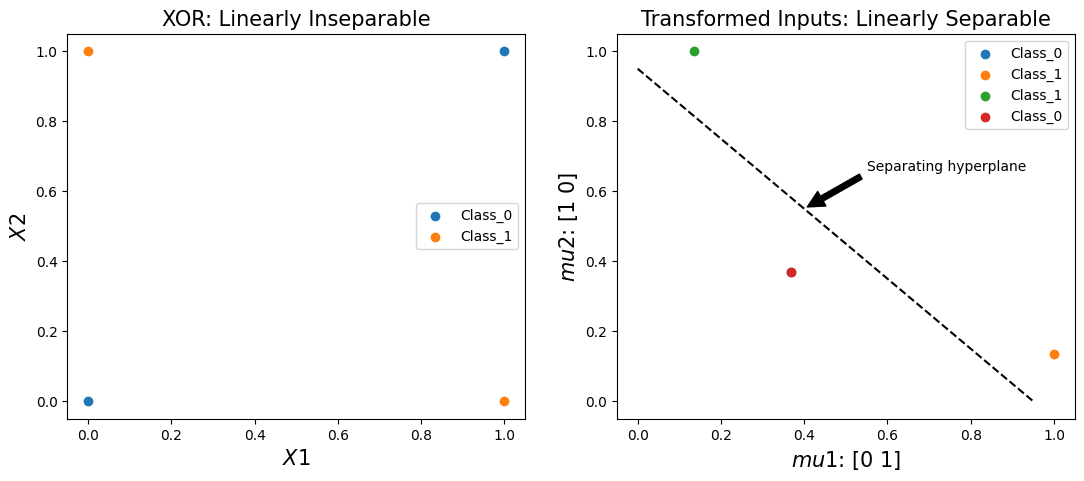

In [7]:
# Train
w, from_1, from_2 = end_to_end(x1, x2, ys, mu1, mu2)

In [8]:
# Test predictions
test_points = [np.array([0, 0]), np.array([0, 1]), np.array([1, 0]), np.array([1, 1])]
preds = predict_matrix(test_points, w, mu1, mu2)


In [9]:
for pt, p in zip(test_points, preds):
    print(f"Input: {pt}, Predicted: {int(p)}")

Input: [0 0], Predicted: 0
Input: [0 1], Predicted: 1
Input: [1 0], Predicted: 1
Input: [1 1], Predicted: 0
